# Homework 7 (30 marks)
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW7_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission.

NOTE: Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 04/23/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below -

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name'))

Import all the libraries you require in the cell below.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Implement the Ensemble methods learnt in class and compare their accuarcies.

The dataset you are going to be using for homework is the **Wisconsin Breast Cancer dataset (cancer.csv)**

The dataset contains a total number of 10 features labeled in either benign or malignant classes. The features have 699 instances out of which 16 feature values are missing. The dataset only contains numeric values.

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant) (**target variable**)

For more information: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

### 1. Read the dataset into variable called '**data**' (1 mark)

In [ ]:
pd.set_option('display.max_columns', 100)
data = pd.read_csv('cancer.csv')


### **Preprocessing**: Data needs to be preprocessed before implementing ensemble methods. It is done for you here. 
### Run the below code first and then answer the questions from 2 - 7.

#### Deleting unnecessary columns: The column "Sample code number" is just an indicator and it's of no use in the modeling. So, let's drop it:


In [ ]:
data.drop(['Sample Code Number'],axis = 1, inplace = True)


#### Handling missing values : 
As mentioned earlier, the dataset contains missing values. The column named "Bland Chromatin" contains them. The missing values are represneted as "?". 

Replace those "?"s with 0's and impute them with Mean Imputation

In [ ]:
data['Bland Chromatin']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bland Chromatin, Length: 699, dtype: object

In [ ]:
data.replace('?',0, inplace=True)

In [ ]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute
values = data.values
# Now impute it
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputedData = imputer.fit_transform(values)

#### Normalizing the data:
Ranges of the features of the dataset are not the same. This may cause a problem. A small change in a feature might not affect the other. To address this problem, normalize the ranges of the features to a uniform range, in this case, 0 - 1.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(imputedData)
cols = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Bare Nuclei', 'Normal Nucleoli', 'Mitosis','Class']
normalizedData = pd.DataFrame(normalizedData, columns=cols)
print(normalizedData.head())

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0         0.444444                 0.000000                  0.000000   
1         0.444444                 0.333333                  0.333333   
2         0.222222                 0.000000                  0.000000   
3         0.555556                 0.777778                  0.777778   
4         0.333333                 0.000000                  0.000000   

   Marginal Adhesion  Single Epithelial Cell Size  Bland Chromatin  \
0           0.000000                     0.111111              0.1   
1           0.444444                     0.666667              1.0   
2           0.000000                     0.111111              0.2   
3           0.000000                     0.222222              0.4   
4           0.222222                     0.111111              0.1   

   Bare Nuclei  Normal Nucleoli  Mitosis  Class  
0     0.222222         0.000000      0.0    0.0  
1     0.222222         0.111111      0.0

### Data preprocessing is done and now you will answer the below questions using the **normalizedData**: 

### 2. Split the data into test and training data with test size - 30%. Compute the baseline classification accuracy for X_train. (3 marks)

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)
baseline_accuracy = dummy_classifier.score(X_test, y_test)
print('Baseline Accuracy: ' + str(round(baseline_accuracy, 3)))

Baseline Accuracy: 0.657


### 3.  Bagging : Build a generic Bagging ensemble and print the accuracy (4 marks)
---


Hyperparameters:

Base estimator = DecisionTreeClassifier

n_estimators = 10

random_state = 42

---


In [ ]:
baseEstimator = DecisionTreeClassifier()
BaggingModel = BaggingClassifier(base_estimator=baseEstimator, n_estimators=10, random_state = 42)
BaggingModel.fit(X_train, y_train)
pred_bagging = BaggingModel.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy: ' + str(round(acc_bagging, 3)))

 Accuracy: 0.938


### 4. RandomForest : (7 marks)
#### a) Build a Random Forest model and print the accuracy (4 marks)
---

Constructor arguments: 


n_estimators = 100, max_features = 7 and random_state = 42 


---




In [ ]:
RandomForestModel = RandomForestClassifier(n_estimators=100, max_features = 7, random_state = 42)
RandomForestModel.fit(X_train, y_train)
RF_predictions = RandomForestModel.predict(X_test)
accuracy = accuracy_score(y_test, RF_predictions)

print(' Accuracy: ' + str(round(accuracy, 3)))

 Accuracy: 0.948


####  b) Calculate the top 3 important features for the above **RandomForest** model and print them (3 marks)

                      features  importance
0              Clump Thickness    0.049299
1     Uniformity of Cell Size     0.377654
2     Uniformity of Cell Shape    0.425358
3            Marginal Adhesion    0.010879
4  Single Epithelial Cell Size    0.022409
5              Bland Chromatin    0.069392
6                  Bare Nuclei    0.025690
7              Normal Nucleoli    0.016530
8                      Mitosis    0.002789

The most important features are, in order, Uniformity of Cell Shape, Uniformity of Cell Size , and Bland Chromatin


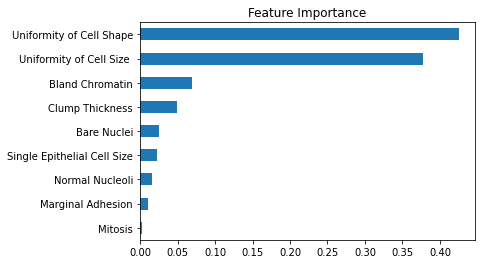

In [ ]:
featureImportance = pd.Series(RandomForestModel.feature_importances_, index = X.columns)
sortedImportances = featureImportance.sort_values()
sortedImportances.plot(kind='barh')
plt.title("Feature Importance")
plt.plot()
fi = RandomForestModel.feature_importances_
features = X.columns
fd = pd.DataFrame({'features': features, 'importance': fi})
print(fd)
a = fd['importance'][0]
index = 0
for i in range(len(fd)):
  if fd['importance'][i] > a:
    a = fd['importance'][i]
    index = i
first = fd['features'][index]   
b = fd['importance'][0]
index = 0
for i in range(len(fd)):
  if fd['importance'][i] < a and fd['importance'][i] > b:
    b = fd['importance'][i]
    index = i 
second = fd['features'][index]
c = fd['importance'][0]
index = 0
for i in range(len(fd)):
  if fd['importance'][i] < a and fd['importance'][i] < b and fd['importance'][i] > c:
    c = fd['importance'][i]
    index = i 
third = fd['features'][index] 
print('')
print('The most important features are, in order, ' + first + ', ' + second + ', and ' + third)

### 5. Boosting: (7 marks)
#### a) Build an AdaBoost model with training data and print the accuracy (4 marks)
---

Hyperparameters:

Base estimator = DecisionTreeClassifier, max_depth = 4

n_estimators = 200

random_state = 42

learning_rate = 0.05


---









In [ ]:
baseEstimator = DecisionTreeClassifier(max_depth=4)
AdaBoost = AdaBoostClassifier(baseEstimator, n_estimators=200, random_state=42, learning_rate=.05)
AdaBoost.fit(X_train, y_train)
accuracy = accuracy_score(y_test, AdaBoost.predict(X_test))
print(' Accuracy: ' + str(round(accuracy, 3)))

 Accuracy: 0.952


#### b) Calculate the top 3 important features for the above **AdaBoost** model and print them (3 marks)

                      features  importance
0              Clump Thickness    0.234803
1     Uniformity of Cell Size     0.041008
2     Uniformity of Cell Shape    0.161213
3            Marginal Adhesion    0.121243
4  Single Epithelial Cell Size    0.048295
5              Bland Chromatin    0.152892
6                  Bare Nuclei    0.057776
7              Normal Nucleoli    0.052007
8                      Mitosis    0.130762

The most important features are, in order, Clump Thickness, Uniformity of Cell Shape, and Bland Chromatin


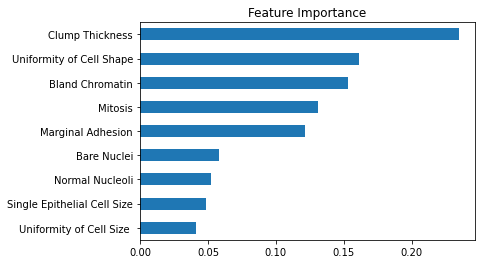

In [ ]:
featureImportance = pd.Series(AdaBoost.feature_importances_, index = X.columns)
sortedImportances = featureImportance.sort_values()
sortedImportances.plot(kind='barh')
plt.title("Feature Importance")
plt.plot()
fi = AdaBoost.feature_importances_
features = X.columns
fd = pd.DataFrame({'features': features, 'importance': fi})
print(fd)
a = fd['importance'][0]
index = 0
for i in range(len(fd)):
  if fd['importance'][i] > a:
    a = fd['importance'][i]
    index = i
first = fd['features'][index]   
b = fd['importance'][index+1]
index = 0
for i in range(len(fd)):
  if fd['importance'][i] < a and fd['importance'][i] > b:
    b = fd['importance'][i]
    index = i 
second = fd['features'][index]
c = fd['importance'][index+1]
index = 0
for i in range(len(fd)):
  if fd['importance'][i] < a and fd['importance'][i] < b and fd['importance'][i] > c:
    c = fd['importance'][i]
    index = i 
third = fd['features'][index] 
print('')
print('The most important features are, in order, ' + first + ', ' + second + ', and ' + third)

### 6. Voting : Using a voting classifier, build an ensemble of RandomForestClassifier, DecisionTreeClassifier, Support Vector Machine and Logistic Regression. (7 marks)


---


Use max_depth = 4, n_estimators = 200, voting = soft

In [ ]:
randomForest = RandomForestClassifier(n_estimators=200, max_depth=4)
svm = SVC(probability=True)
logisticRegression = LogisticRegression()
decisionTree = DecisionTreeClassifier(max_depth=4)

ensemble = VotingClassifier(estimators = [('RandomForest', randomForest), ('SVM', svm), ('LogisticRegression', logisticRegression), ('DecisionTree', decisionTree)], voting='soft')

ensemble.fit(X_train, y_train)

predictions = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(' Accuracy: ' + str(round(accuracy, 3)))

 Accuracy: 0.957


### 7. Mention the best model among the above 4 models and its accuracy (1 mark)

In [ ]:
# The best model was the ensemble model with an accuracy of 95.7%. It appears that
# the ensemble was able to conceive a sort of "super-model" amongst all of the other four
# models whose predictive ability was greater than each of the four's individual predidictive abilities.